In [1]:
import gensim
import gensim.downloader as api
import json
import tqdm as notebook_tqdm
from math import sqrt, pow, exp
import numpy as np
from sentence_transformers import SentenceTransformer, util
sent_BERT = SentenceTransformer('stsb-roberta-large')
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
dataset = api.load("text8")
data = [i for i in dataset]
training_data = list(tagged_document(data))
doc2vec = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
 
doc2vec.build_vocab(training_data)
doc2vec.train(training_data, total_examples=doc2vec.corpus_count, epochs=doc2vec.epochs)

C:\Users\kevin\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def squared_sum(x):
  """ return 3 rounded square rooted value """
 
  return round(sqrt(sum([a*a for a in x])),3)

def cos_similarity(x,y):
  """ return cosine similarity between two lists """
 
  numerator = sum(a*b for a,b in zip(x,y))
  denominator = squared_sum(x)*squared_sum(y)
  return round(numerator/float(denominator),3)

In [19]:
data[0]['items'][0]['snippet']['predict_title']

'A group of three birds standing on top of a purple flower.'

In [39]:
data[0]['items'][0]['snippet']['title']

'Abiogenesis | A Short Film by Richard Mans'

In [40]:
genres = ['action_game', 'basketball', 'boxing', 'business', 'christian_music', 'electronic_music', 'fashion', 'food', 'football', 'golf', 'health', 'hip_hop_music', 
          'humor', 'jazz', 'military','motorsport', 'movies', 'performing_arts', 'pets', 'politics', 'racing_video_game', 'religion', 
          'role_playing_video_game', 'sports_game', 'technology']
sport = ['basketball', 'boxing', 'football', 'golf', 'motorsport']
game = ['action_game', 'racing_video_game', 'role_playing_video_game', 'sports_game']
music = ['christian_music', 'electronic_music', 'hip_hop_music', 'jazz']
entertainment = ['fashion', 'humor', 'movies', 'performing_arts']

In [41]:
doc2vec_dict = {}
sent_BERT_dict = {}
for i in range(len(genres)):
    filename = genres[i] + '.json'
    doc2vec_result = np.array([0])
    sent_BERT_result = np.array([0])
    file = open(filename)
    data = json.load(file)
    file.close()
    for j in range(len(data)):
        doc2vec_output = np.zeros(len(data[j]['items']))
        sent_BERT_output = np.zeros(len(data[j]['items']))
        for k in range(len(data[j]['items'])):
            titles = [data[j]['items'][k]['snippet']['predict_title'], data[j]['items'][k]['snippet']['title']]
            vectors = [doc2vec.infer_vector([word for word in sent]) for sent in titles]
            doc2vec_output[k] = cos_similarity(vectors[0], vectors[1])
            embeddings = sent_BERT.encode(titles, convert_to_tensor=True)
            sent_BERT_output[k] = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()
        doc2vec_result = np.concatenate((doc2vec_result, doc2vec_output), axis=0)
        sent_BERT_result = np.concatenate((sent_BERT_result, sent_BERT_output), axis = 0)
    doc2vec_result = np.delete(doc2vec_result, [0])
    sent_BERT_result = np.delete(sent_BERT_result, [0])
    doc2vec_dict[genres[i]] = doc2vec_result
    sent_BERT_dict[genres[i]] = sent_BERT_result

In [42]:
import matplotlib.pyplot as plt
doc2vec_sport = np.array([0])
sent_BERT_sport = np.array([0])
for i in sport:
    doc2vec_sport = np.concatenate((doc2vec_sport, doc2vec_dict[i]), axis=0)
    sent_BERT_sport = np.concatenate((sent_BERT_sport, sent_BERT_dict[i]), axis=0)
doc2vec_sport = np.delete(doc2vec_sport, [0])
sent_BERT_sport = np.delete(sent_BERT_sport, [0])


doc2vec_game = np.array([0])
sent_BERT_game = np.array([0])
for i in game:
    doc2vec_game = np.concatenate((doc2vec_game, doc2vec_dict[i]), axis=0)
    sent_BERT_game = np.concatenate((sent_BERT_game, sent_BERT_dict[i]), axis=0)
doc2vec_game = np.delete(doc2vec_game, [0])
sent_BERT_game = np.delete(sent_BERT_game, [0])


doc2vec_music = np.array([0])
sent_BERT_music = np.array([0])
for i in music:
    doc2vec_music = np.concatenate((doc2vec_music, doc2vec_dict[i]), axis=0)
    sent_BERT_music = np.concatenate((sent_BERT_music, sent_BERT_dict[i]), axis=0)
doc2vec_music = np.delete(doc2vec_music, [0])
sent_BERT_music = np.delete(sent_BERT_music, [0])


doc2vec_enter = np.array([0])
sent_BERT_enter = np.array([0])
for i in entertainment:
    doc2vec_enter = np.concatenate((doc2vec_enter, doc2vec_dict[i]), axis=0)
    sent_BERT_enter = np.concatenate((sent_BERT_enter, sent_BERT_dict[i]), axis=0)
doc2vec_enter = np.delete(doc2vec_enter, [0])
sent_BERT_enter = np.delete(sent_BERT_enter, [0])

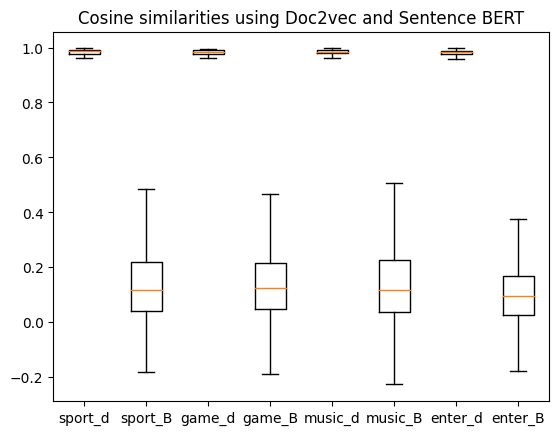

In [54]:
x_corr = ['sport_d', 'sport_B', 'game_d', 'game_B', 'music_d', 'music_B', 'enter_d', 'enter_B']
height = [np.mean(doc2vec_sport), np.mean(sent_BERT_sport), np.mean(doc2vec_game), np.mean(sent_BERT_game), np.mean(doc2vec_music), np.mean(sent_BERT_music), np.mean(doc2vec_enter), np.mean(sent_BERT_enter)]
err = [np.std(doc2vec_sport), np.std(sent_BERT_sport), np.std(doc2vec_game), np.std(sent_BERT_game), np.std(doc2vec_music), np.std(sent_BERT_music), np.std(doc2vec_enter), np.std(sent_BERT_enter)]
result = [doc2vec_sport, sent_BERT_sport, doc2vec_game, sent_BERT_game, doc2vec_music, sent_BERT_music, doc2vec_enter, sent_BERT_enter]
plt.boxplot(result, showfliers=False, labels= x_corr)
plt.title('Cosine similarities using Doc2vec and Sentence BERT')
plt.savefig('similarity.png')

In [55]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import nltk
nltk.download('punkt')
tokenizer = AutoTokenizer.from_pretrained("fabiochiu/t5-base-tag-generation")
model = AutoModelForSeq2SeqLM.from_pretrained("fabiochiu/t5-base-tag-generation")
text = 'After combing the Coruscant underworld for Boba Fett, Plo Koon and Ahsoka set out to capture he and his fellow bounty hunters'
inputs = tokenizer([text], max_length=512, truncation=True, return_tensors="pt")
output = model.generate(**inputs, num_beams=8, do_sample=True, min_length=10,
                        max_length=64)
decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
tags = list(set(decoded_output.strip().split(", ")))



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
C:\Users\kevin\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kevin\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warning

In [57]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
filename = 'politics.json'
alltags = []
file = open(filename)
data = json.load(file)
file.close()
for j in range(len(data)):
    for k in range(len(data[j]['items'])):
        titles = [data[j]['items'][k]['snippet']['predict_title'], data[j]['items'][k]['snippet']['title']]
        inputs = tokenizer([text], max_length=512, truncation=True, return_tensors="pt")
        output = model.generate(**inputs, num_beams=8, do_sample=True, min_length=10,
                        max_length=64)
        decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
        tags = list(set(decoded_output.strip().split(", ")))
        alltags = alltags + tags


In [58]:
len(alltags)

1569

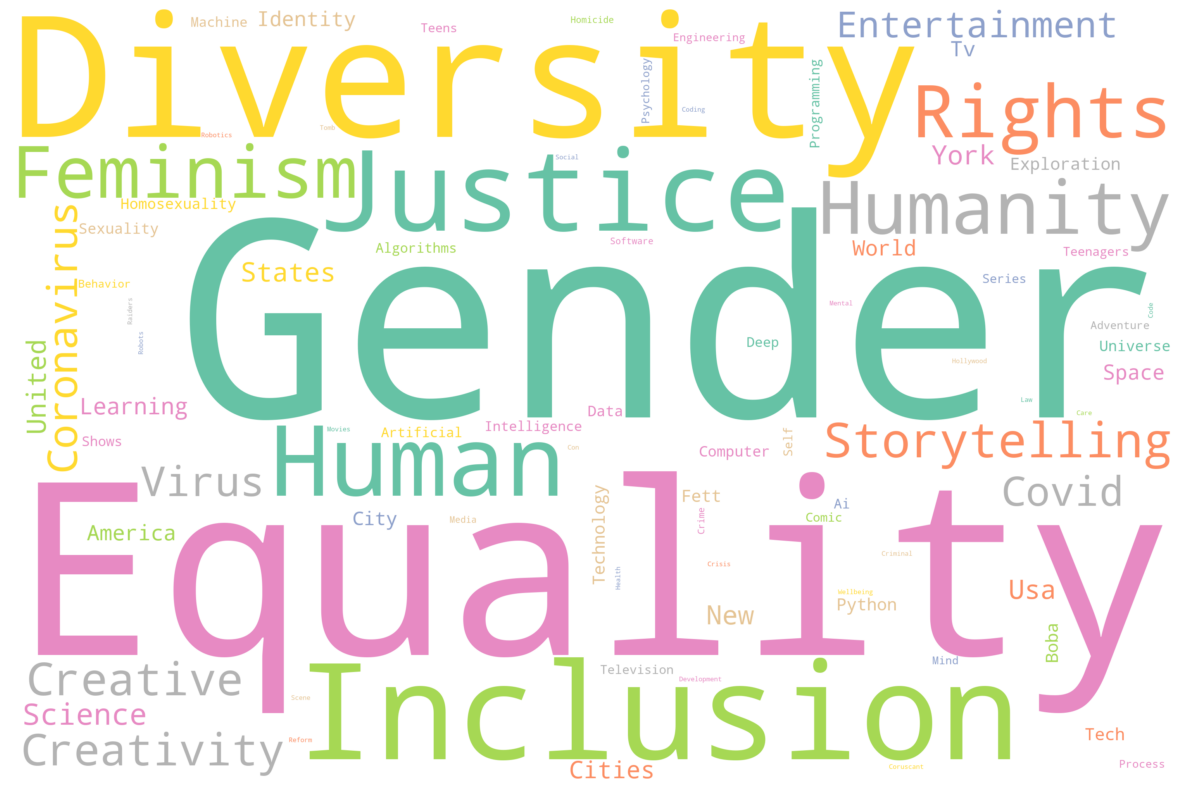

In [70]:
input_wordscloud = " ".join(alltags)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False).generate(input_wordscloud)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.show()

In [69]:
plt.savefig('wordcloud.png', bbox_inches='tight', pad_inches=0)

<Figure size 640x480 with 0 Axes>